In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

In [ ]:
ESR = pd.read_csv('Epileptic Seizure Recognition.csv')

<ipython-input-5-ede7aa9cc3d7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tgt[tgt>1]=0


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7b5fa289beb0> (for post_execute):


KeyboardInterrupt: 

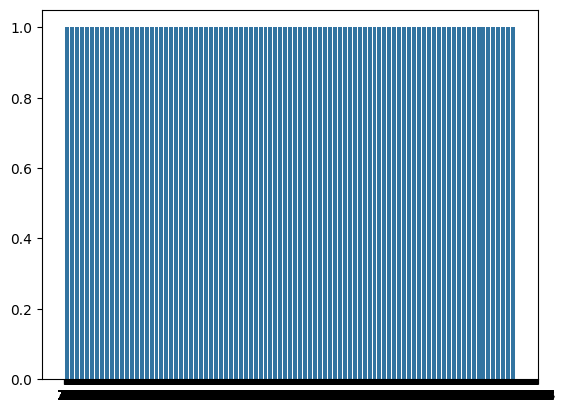

In [ ]:
cols = ESR.columns
tgt = ESR.y
tgt[tgt>1]=0
ax = sn.countplot(tgt,label="Count")
non_seizure, seizure = tgt.value_counts()
print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

In [ ]:
ESR.isnull().sum()

Unnamed    0
X1         0
X2         0
X3         0
X4         0
          ..
X175       0
X176       0
X177       0
X178       0
y          0
Length: 180, dtype: int64

In [ ]:
# Extract the target variable
tgt = ESR['y']

# Convert the target variable to binary (0 for non-seizure, 1 for seizure)
tgt[tgt > 1] = 0

<ipython-input-7-8e337570f3d2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tgt[tgt > 1] = 0


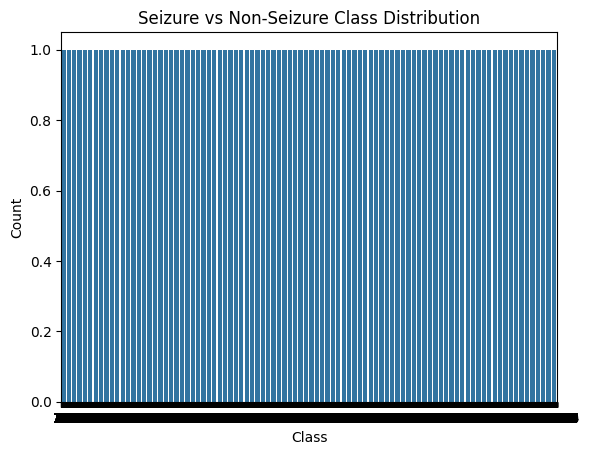

The number of trials for the non-seizure class is: 9200
The number of trials for the seizure class is: 2300


In [ ]:
# Visualize the class distribution
ax = sn.countplot(tgt, label="Count")
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Seizure vs Non-Seizure Class Distribution')
plt.show()

# Get the counts of each class
non_seizure, seizure = tgt.value_counts()

print('The number of trials for the non-seizure class is:', non_seizure)
print('The number of trials for the seizure class is:', seizure)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
ESR = pd.read_csv('Epileptic Seizure Recognition.csv')

# Drop the non-numeric 'Unnamed' column
ESR = ESR.drop(columns=['Unnamed'])

# Extract the target variable
tgt = ESR['y']

# Convert the target variable to binary (0 for non-seizure, 1 for seizure)
tgt[tgt > 1] = 0

# Split the dataset into features and target
X = ESR.iloc[:, :-1]  # Features (all columns except the last one)
y = tgt  # Target variable

# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()

# Fit and transform the training data
X_train = scaler.fit_transform(X_train)

# Transform the test data
X_test = scaler.transform(X_test)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (9200, 178)
Test set shape: (2300, 178)


#LOGISTIC REGRESSION

Accuracy: 0.7156521739130435
Precision: 0.3411764705882353
Recall: 0.43655913978494626
F1 Score: 0.3830188679245283


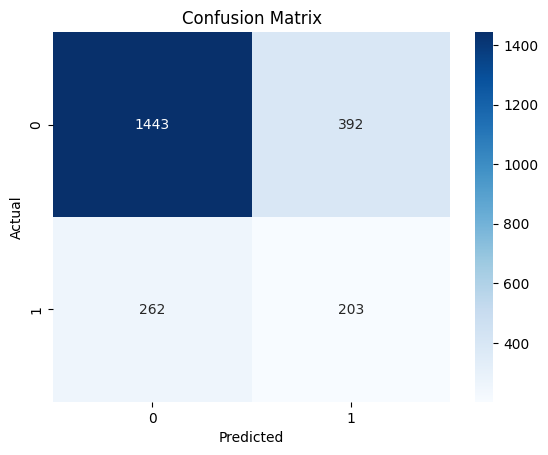

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sn
import matplotlib.pyplot as plt

# Train the logistic regression model
model = LogisticRegression(max_iter=1000, class_weight='balanced')
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Visualize the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#RANDOM FOREST

Random Forest Accuracy: 0.9721739130434782
Random Forest Precision: 0.9739952718676123
Random Forest Recall: 0.886021505376344
Random Forest F1 Score: 0.927927927927928


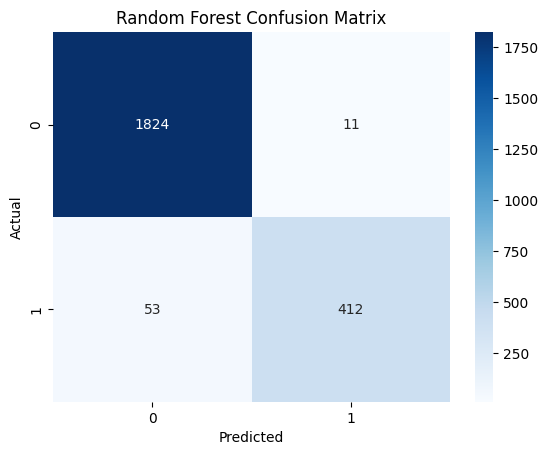

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate evaluation metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest Precision:", precision_rf)
print("Random Forest Recall:", recall_rf)
print("Random Forest F1 Score:", f1_rf)

# Visualize the confusion matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Random Forest Confusion Matrix')
plt.show()


#SUPPORT VECTOR MACHINE

Support Vector Machine Accuracy: 0.9786956521739131
Support Vector Machine Precision: 0.9297520661157025
Support Vector Machine Recall: 0.967741935483871
Support Vector Machine F1 Score: 0.9483667017913594


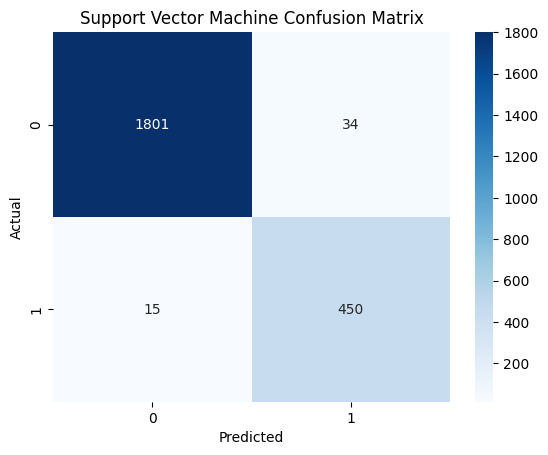

In [ ]:
from sklearn.svm import SVC

# Train a Support Vector Machine classifier
svm_model = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)

# Calculate evaluation metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)

print("Support Vector Machine Accuracy:", accuracy_svm)
print("Support Vector Machine Precision:", precision_svm)
print("Support Vector Machine Recall:", recall_svm)
print("Support Vector Machine F1 Score:", f1_svm)

# Visualize the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Support Vector Machine Confusion Matrix')
plt.show()


#ARTIFICIAL NEURAL NETWORK

Epoch 1/10
288/288 [==============================] - 2s 2ms/step - loss: 0.2743 - accuracy: 0.9404
Epoch 2/10
288/288 [==============================] - 1s 2ms/step - loss: 0.1134 - accuracy: 0.9676
Epoch 3/10
288/288 [==============================] - 1s 2ms/step - loss: 0.0881 - accuracy: 0.9728
Epoch 4/10
288/288 [==============================] - 1s 3ms/step - loss: 0.0754 - accuracy: 0.9771
Epoch 5/10
288/288 [==============================] - 1s 3ms/step - loss: 0.0643 - accuracy: 0.9796
Epoch 6/10
288/288 [==============================] - 1s 4ms/step - loss: 0.0550 - accuracy: 0.9815
Epoch 7/10
288/288 [==============================] - 1s 4ms/step - loss: 0.0559 - accuracy: 0.9812
Epoch 8/10
288/288 [==============================] - 1s 2ms/step - loss: 0.0460 - accuracy: 0.9840
Epoch 9/10
288/288 [==============================] - 1s 2ms/step - loss: 0.0440 - accuracy: 0.9863
Epoch 10/10
72/72 [==============================] - 0s 2ms/step
ANN Accuracy: 0.9769565217391304
AN

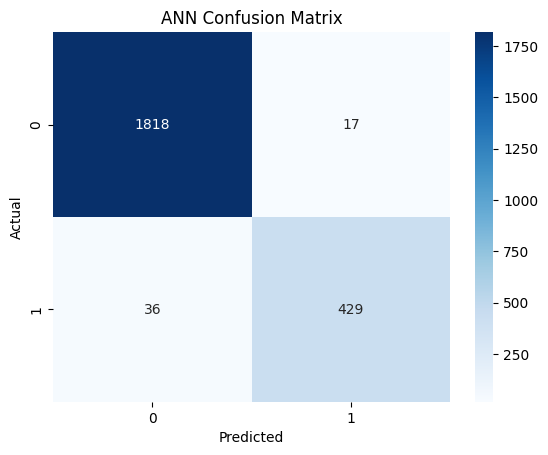

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

# Initialize the ANN
ann_model = Sequential()

# Adding the input layer and the first hidden layer
ann_model.add(Dense(units=80, activation='relu', kernel_initializer='uniform', input_dim=178))

# Adding the second hidden layer
ann_model.add(Dense(units=80, activation='relu', kernel_initializer='uniform'))

# Adding the output layer
ann_model.add(Dense(units=1, activation='sigmoid', kernel_initializer='uniform'))

# Compiling the ANN
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the training set
ann_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Making predictions on the test set
y_pred_ann = ann_model.predict(X_test)
y_pred_ann = (y_pred_ann > 0.5)

# Calculating evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

accuracy_ann = accuracy_score(y_test, y_pred_ann)
precision_ann = precision_score(y_test, y_pred_ann)
recall_ann = recall_score(y_test, y_pred_ann)
f1_ann = f1_score(y_test, y_pred_ann)

print("ANN Accuracy:", accuracy_ann)
print("ANN Precision:", precision_ann)
print("ANN Recall:", recall_ann)
print("ANN F1 Score:", f1_ann)

# Visualizing the confusion matrix
conf_matrix_ann = confusion_matrix(y_test, y_pred_ann)
sns.heatmap(conf_matrix_ann, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('ANN Confusion Matrix')
plt.show()


Epoch 1/50
230/230 [==============================] - 2s 3ms/step - loss: 0.5790 - accuracy: 0.7851 - val_loss: 0.3248 - val_accuracy: 0.9212
Epoch 2/50
230/230 [==============================] - 1s 2ms/step - loss: 0.3016 - accuracy: 0.9221 - val_loss: 0.1761 - val_accuracy: 0.9467
Epoch 3/50
230/230 [==============================] - 1s 2ms/step - loss: 0.1891 - accuracy: 0.9443 - val_loss: 0.1342 - val_accuracy: 0.9478
Epoch 4/50
230/230 [==============================] - 1s 3ms/step - loss: 0.1541 - accuracy: 0.9549 - val_loss: 0.1157 - val_accuracy: 0.9543
Epoch 5/50
230/230 [==============================] - 1s 2ms/step - loss: 0.1406 - accuracy: 0.9584 - val_loss: 0.1101 - val_accuracy: 0.9587
Epoch 6/50
230/230 [==============================] - 1s 3ms/step - loss: 0.1295 - accuracy: 0.9588 - val_loss: 0.1108 - val_accuracy: 0.9576
Epoch 7/50
230/230 [==============================] - 1s 3ms/step - loss: 0.1235 - accuracy: 0.9624 - val_loss: 0.1005 - val_accuracy: 0.9609
Epoch 

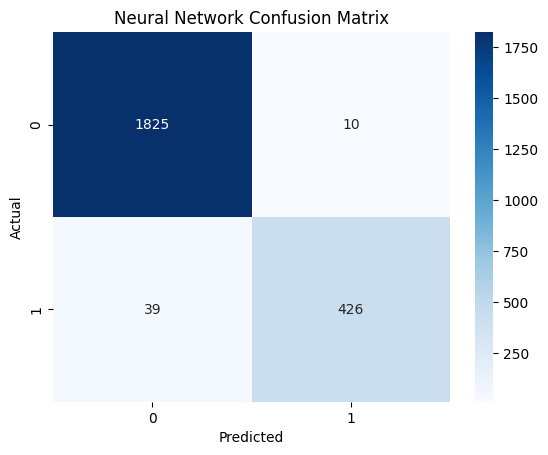

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define the neural network model
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

# Create the model
input_dim = X_train.shape[1]
model = create_model(input_dim)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int)

accuracy_nn = accuracy_score(y_test, y_pred_nn)
precision_nn = precision_score(y_test, y_pred_nn)
recall_nn = recall_score(y_test, y_pred_nn)
f1_nn = f1_score(y_test, y_pred_nn)

print("Neural Network Accuracy:", accuracy_nn)
print("Neural Network Precision:", precision_nn)
print("Neural Network Recall:", recall_nn)
print("Neural Network F1 Score:", f1_nn)

# Visualize the confusion matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Neural Network Confusion Matrix')
plt.show()


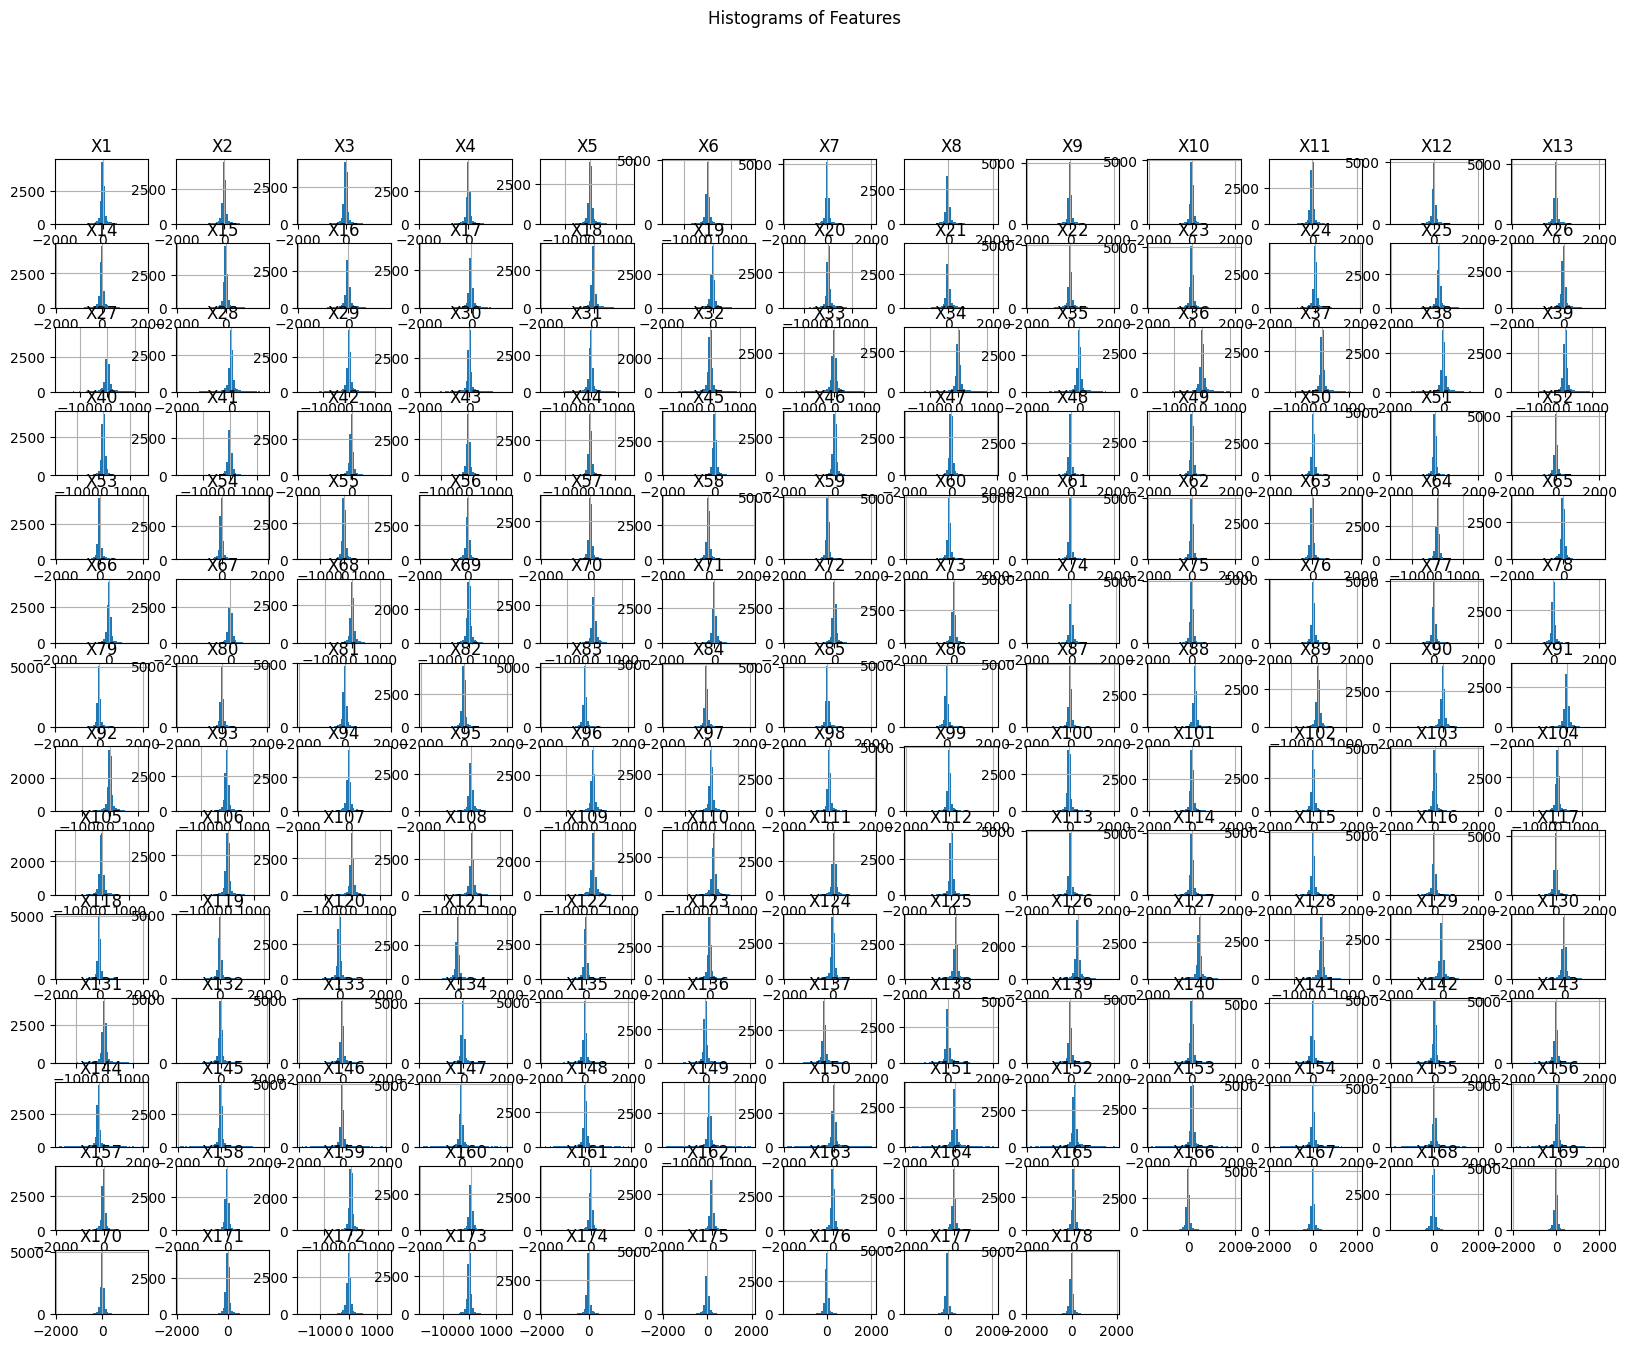

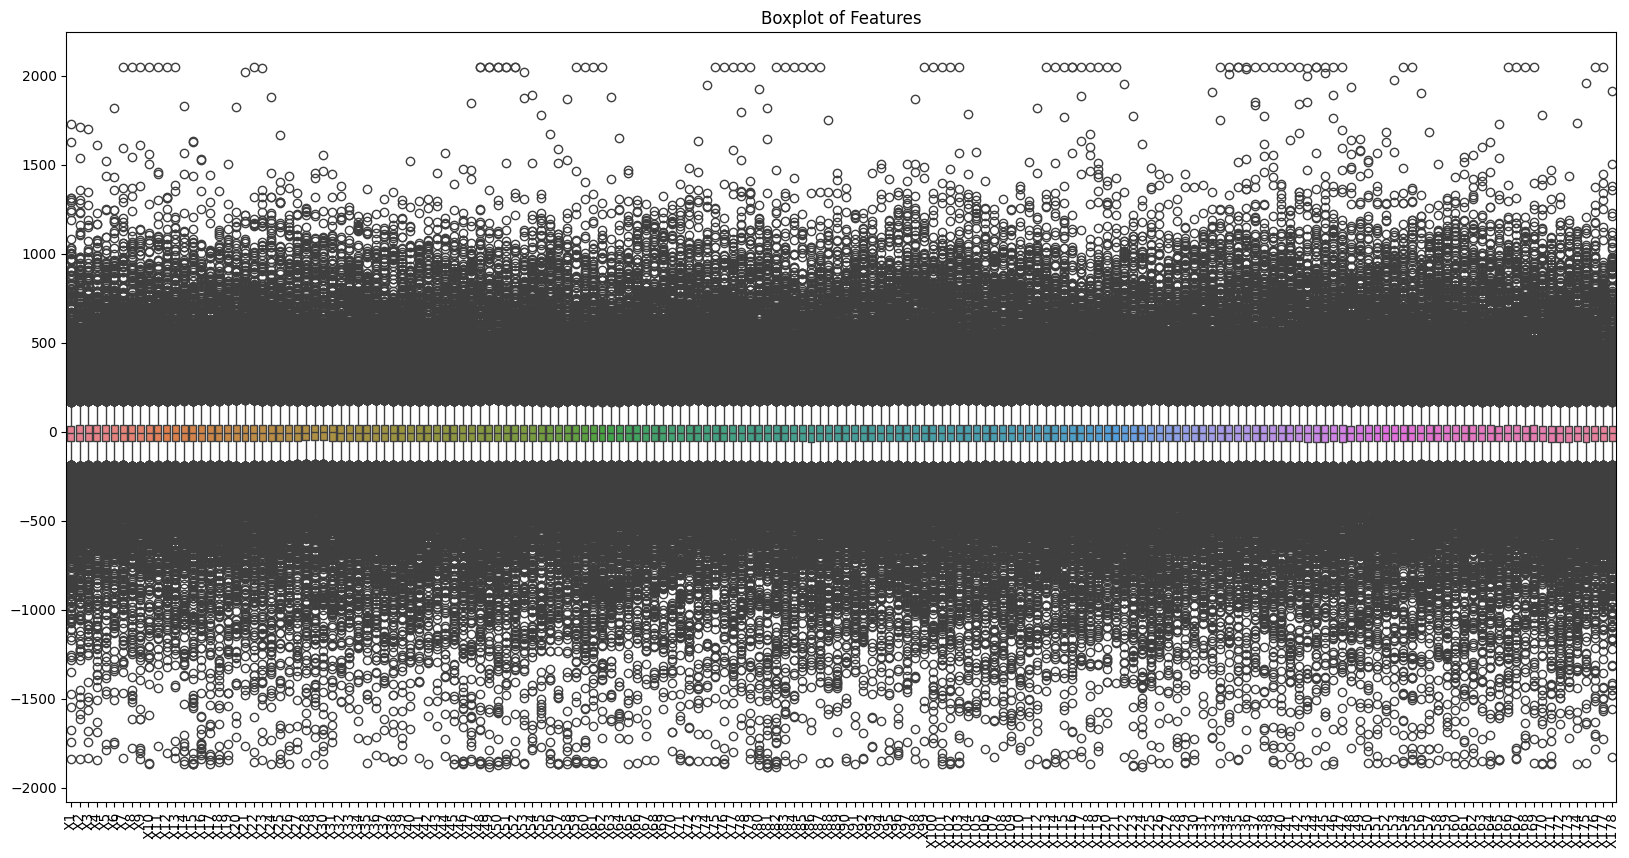

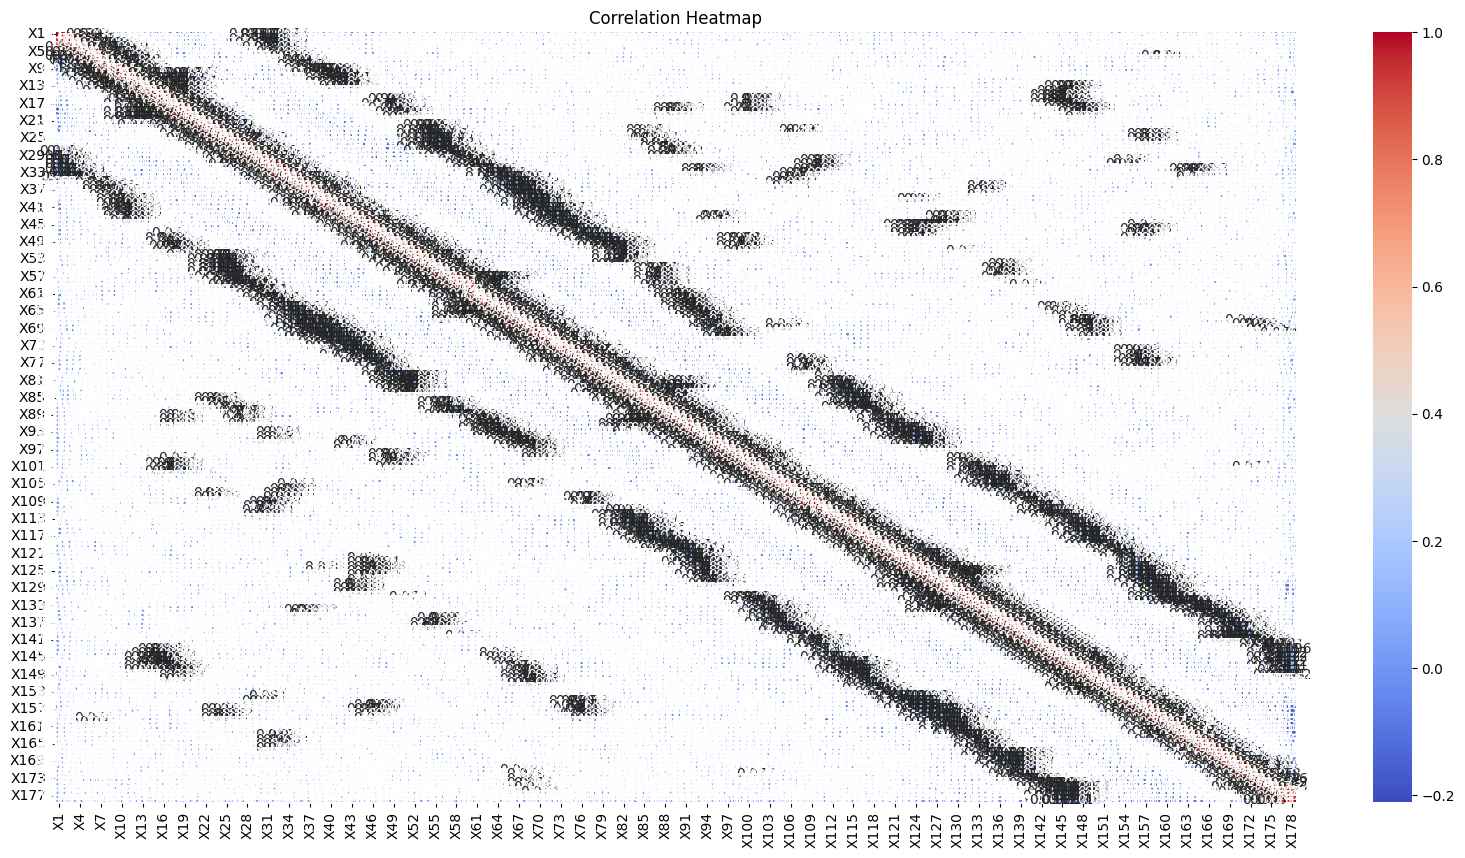

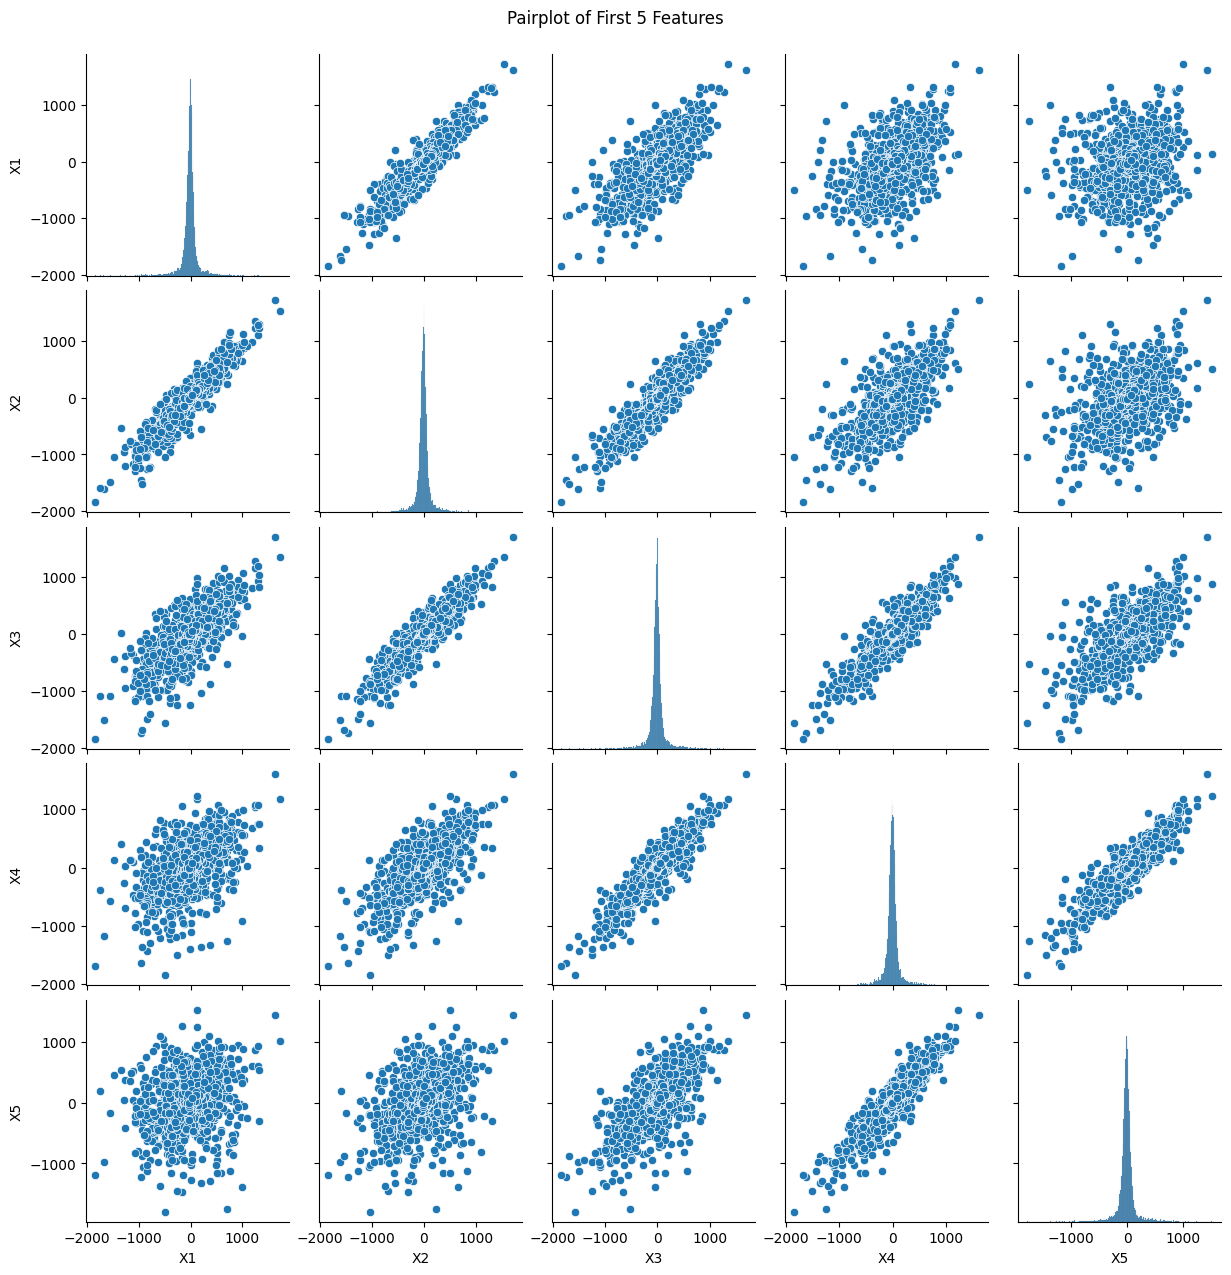

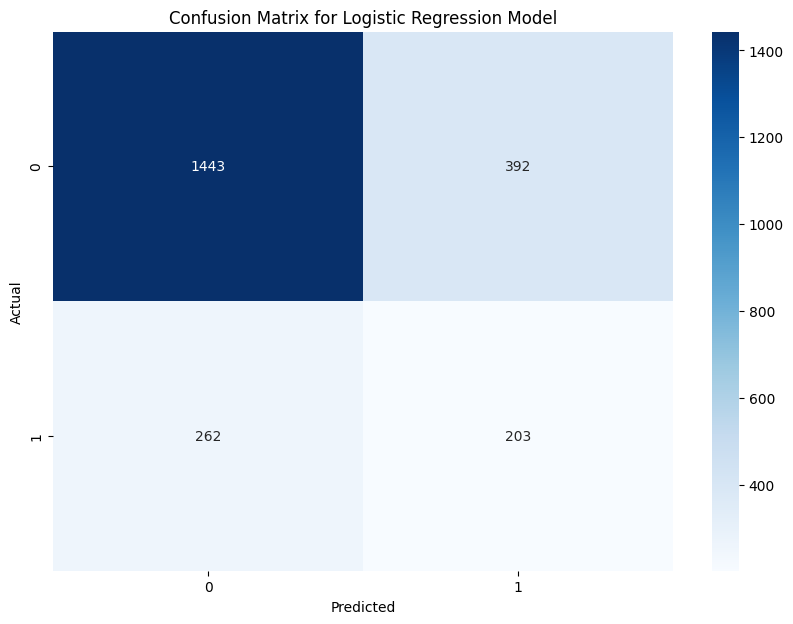

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

# Load the dataset
ESR = pd.read_csv('Epileptic Seizure Recognition.csv')

# Drop the non-numeric 'Unnamed' column if it exists
if 'Unnamed' in ESR.columns:
    ESR = ESR.drop(columns=['Unnamed'])

# Extract the target variable and convert it to binary
tgt = ESR['y']
tgt[tgt > 1] = 0
ESR['y'] = tgt

# 1. Histogram of each feature
ESR.iloc[:, :-1].hist(bins=50, figsize=(20, 15))
plt.suptitle("Histograms of Features")
plt.show()

# 2. Boxplot for each feature
plt.figure(figsize=(20, 10))
sns.boxplot(data=ESR.iloc[:, :-1])
plt.title("Boxplot of Features")
plt.xticks(rotation=90)
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(20, 10))
corr = ESR.iloc[:, :-1].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 4. Pairplot
sns.pairplot(ESR.iloc[:, :5])  # Pairplot for the first 5 features for better visualization
plt.suptitle("Pairplot of First 5 Features", y=1.02)
plt.show()

# 5. Confusion Matrix for the Logistic Regression Model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Split the dataset into features and target
X = ESR.iloc[:, :-1]
y = ESR['y']

# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
logistic_model = LogisticRegression(max_iter=1000, class_weight='balanced')
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_logistic)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.show()


Epoch 1/50
230/230 [==============================] - 4s 9ms/step - loss: 0.6020 - accuracy: 0.7914 - val_loss: 0.3304 - val_accuracy: 0.9380
Epoch 2/50
230/230 [==============================] - 1s 5ms/step - loss: 0.3285 - accuracy: 0.9158 - val_loss: 0.1812 - val_accuracy: 0.9560
Epoch 3/50
230/230 [==============================] - 1s 4ms/step - loss: 0.2101 - accuracy: 0.9412 - val_loss: 0.1288 - val_accuracy: 0.9603
Epoch 4/50
230/230 [==============================] - 1s 4ms/step - loss: 0.1698 - accuracy: 0.9501 - val_loss: 0.1175 - val_accuracy: 0.9636
Epoch 5/50
230/230 [==============================] - 1s 4ms/step - loss: 0.1517 - accuracy: 0.9554 - val_loss: 0.1062 - val_accuracy: 0.9668
Epoch 6/50
230/230 [==============================] - 1s 4ms/step - loss: 0.1372 - accuracy: 0.9602 - val_loss: 0.0941 - val_accuracy: 0.9658
Epoch 7/50
230/230 [==============================] - 2s 8ms/step - loss: 0.1331 - accuracy: 0.9577 - val_loss: 0.0971 - val_accuracy: 0.9679
Epoch 

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


72/72 [==============================] - 0s 1ms/step
Logistic Regression - Accuracy: 0.7157, Precision: 0.3412, Recall: 0.4366, F1 Score: 0.3830
Random Forest - Accuracy: 0.9722, Precision: 0.9740, Recall: 0.8860, F1 Score: 0.9279
Neural Network - Accuracy: 0.9735, Precision: 0.9449, Recall: 0.9226, F1 Score: 0.9336


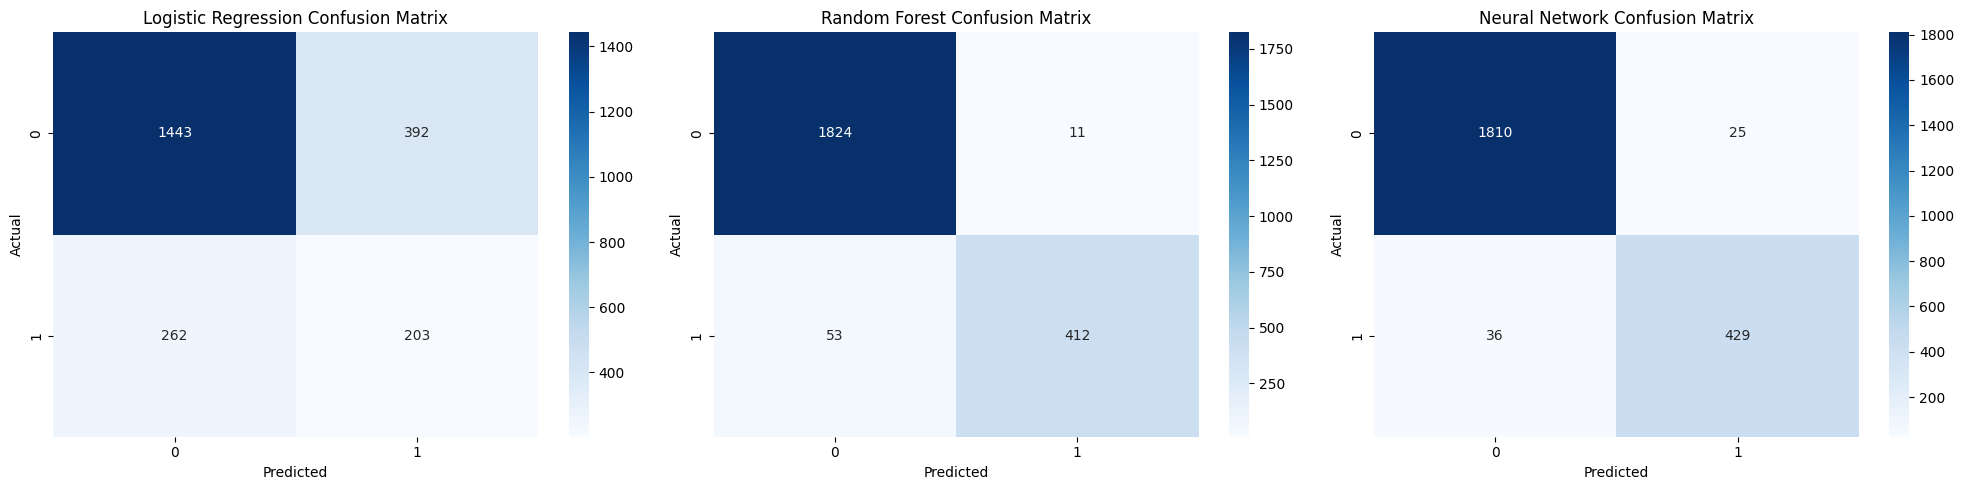

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
import joblib

# Load the dataset
ESR = pd.read_csv('Epileptic Seizure Recognition.csv')

# Drop the non-numeric 'Unnamed' column
ESR = ESR.drop(columns=['Unnamed'])

# Extract the target variable and convert to binary
tgt = ESR['y']
tgt[tgt > 1] = 0
ESR['y'] = tgt

# Split the dataset into features and target
X = ESR.iloc[:, :-1]
y = ESR['y']

# Split the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
def create_model(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    return model

input_dim = X_train.shape[1]
nn_model = create_model(input_dim)

# Compile the neural network model
nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the neural network model
history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Save the models
joblib.dump(scaler, 'scaler.joblib')
joblib.dump(LogisticRegression(max_iter=1000, class_weight='balanced').fit(X_train, y_train), 'logistic_model.joblib')
joblib.dump(RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42).fit(X_train, y_train), 'random_forest_model.joblib')
nn_model.save('neural_network_model.h5')

# Load the models
logistic_model = joblib.load('logistic_model.joblib')
rf_model = joblib.load('random_forest_model.joblib')
nn_model = load_model('neural_network_model.h5')

# Predictions
y_pred_logistic = logistic_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_nn = nn_model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int).flatten()

# Evaluate models
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Logistic Regression
logistic_metrics = evaluate_model(y_test, y_pred_logistic)
# Random Forest
rf_metrics = evaluate_model(y_test, y_pred_rf)
# Neural Network
nn_metrics = evaluate_model(y_test, y_pred_nn)

# Print metrics
print("Logistic Regression - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}".format(*logistic_metrics))
print("Random Forest - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}".format(*rf_metrics))
print("Neural Network - Accuracy: {:.4f}, Precision: {:.4f}, Recall: {:.4f}, F1 Score: {:.4f}".format(*nn_metrics))

# Confusion Matrix Comparison
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

# Logistic Regression Confusion Matrix
conf_matrix_logistic = confusion_matrix(y_test, y_pred_logistic)
sns.heatmap(conf_matrix_logistic, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Random Forest Confusion Matrix
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Random Forest Confusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

# Neural Network Confusion Matrix
conf_matrix_nn = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(conf_matrix_nn, annot=True, fmt='d', cmap='Blues', ax=axes[2])
axes[2].set_title('Neural Network Confusion Matrix')
axes[2].set_xlabel('Predicted')
axes[2].set_ylabel('Actual')

plt.tight_layout()
plt.show()
